# **Assignment 3**
# **Solar irradiance**

### **Data Analysis for Space Weather | Instructor: Prof Podladchikova | April, 2021**
### **by Victoria Krivova, Polina Starodumova**

In this assignment, we need to calculate the Total Solar Irradiance (TSI) which is the radiant energy emitted by the Sun at all wavelengths crossing a square meter each second outside Earth’s atmosphere. Here we also need to recall the Stefan-Boltzmann's law which states that the energy radiated from a black body is proportional to the fourth power of the absolute temperature. It is possible to obtain the approximate value of the Total Solar Irradiance (TSI) using Stefan-Boltzmann law:
$$P = \sigma T^4 A$$

where $P$ corresponds to an estimate value of TSI, $\sigma = 5.68 \cdot 10^{-8} W m^{-2} K^{-4}$, $T$ is the temperature and $A$ is the area.

In [ ]:
pip install julian

  Created wheel for julian: filename=julian-0.14-cp37-none-any.whl size=2636 sha256=ba9c58cef588bd2e5c18c18d37d3c839ec3b0c2a1c98cafa8f857182156c28c8
  Stored in directory: /root/.cache/pip/wheels/ce/b7/8a/aa742c5ae0a627cc1a665f14550988c012f8c38fc15c2f80b9
Successfully built julian


In [ ]:
# Firstly, we import all the libraries we need
import numpy as np
import pandas as pd
from google.colab import files
import datetime
import matplotlib.pyplot as plt
import statsmodels.sandbox.tsa

In [ ]:
# Then, we upload the datasets
uploaded = files.upload()

Saving international_sunspot_number.csv to international_sunspot_number.csv
Saving sorce_tsi_24hr_l3.csv to sorce_tsi_24hr_l3.csv


**The solar radiation is the flux of energy emitted by the Sun and transmitted in the form of electromagnetic radiation. For many years it was considered a constant: let us calculate it first.**



In [ ]:
sigma = 5.68 * 10 ** (-8) # W m-2 K-4

R_S  = 696340  # km
R_AU = 149.8e6 # km

A1 = 4 * np.pi * R_S ** 2
A2 = 4 * np.pi * R_AU ** 2

T = 5800 # K

In [ ]:
P = sigma * T**4 * A1 / A2
print('Estimated value of the total solar irradiance is %.1f' % P, 'W/m2.')

Estimated value of the Total Solar Irradiance is 1388.9 W/m2.


**However, continuous space observations since the 1970s have shown variation in time scales from minutes to decades. Here we will analyze data collected from 2003 to 2021 and observe these variations as well as discuss the possible causes of these variations.**

In [ ]:
# Import dataset with the numbers of sunspot numbers observed per day
df_num = pd.read_csv('international_sunspot_number.csv', delim_whitespace=True)

In [ ]:
# Import dataset with the values of TSI
df_TSI = pd.read_csv('sorce_tsi_24hr_l3.csv', sep=',')

In [ ]:
# Convert dates from the dataset from Julian to Gregorian
df_TSI['Date (GD)'] = pd.to_datetime(df_TSI['time (Julian Date)'], unit='D', origin='julian')

In [ ]:
# Concatenate date data in one column
df_num['Date (GD)'] = 0
for i in range (len(df_num['%YYY'])):
  df_num['Date (GD)'][i] = datetime.datetime(df_num['%YYY'][i], df_num['M'][i], df_num['D'][i], 12, 0, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Delete the rows where TSI equals to zero
df_TSI = df_TSI.loc[df_TSI['tsi_1au (W/m^2)'] != 0]

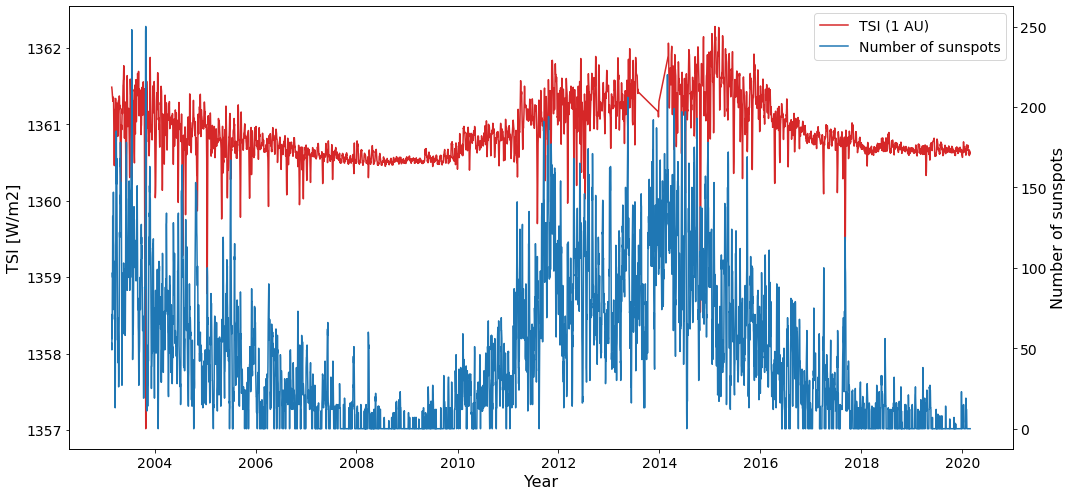

In [ ]:
# Plot the data

fig, ax1 = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(15)

color = 'tab:red'
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('TSI [W/m2]', fontsize=16)
ax1.plot(df_TSI['Date (GD)'], df_TSI['tsi_1au (W/m^2)'], color=color, label='TSI (1 AU)')
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of sunspots',  fontsize=16)  # we already handled the x-label with ax1
ax2.plot(df_num['Date (GD)'], df_num['sn'], color=color, label='Number of sunspots')
ax2.tick_params(axis='y', labelsize=14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes, fontsize=14)
plt.show()

**It is seen on the plots that the trend observed for the value of TSI is highly similar to that for the number of sunspots observed at the same time. However, in order to see clearly the dependency, we need to smooth the curves. For that, we will be using the running mean smoothing method over a month and over a year.**

In [ ]:
# Here we obtain the smoothed curve per month of TSI and sunspot data
df_TSI['MovMeanMonth'] = statsmodels.sandbox.tsa.movstat.movmean(np.array(df_TSI['tsi_1au (W/m^2)']), windowsize=31, lag='centered');
df_num['MovMeanMonth'] = statsmodels.sandbox.tsa.movstat.movmean(np.array(df_num['sn']), windowsize=31, lag='centered');

In [ ]:
# And the smoothed curve per year of TSI and sunspot data
df_TSI['MovMeanYear'] = statsmodels.sandbox.tsa.movstat.movmean(np.array(df_TSI['tsi_1au (W/m^2)']), windowsize=365, lag='centered');
df_num['MovMeanYear'] = statsmodels.sandbox.tsa.movstat.movmean(np.array(df_num['sn']), windowsize=365, lag='centered');

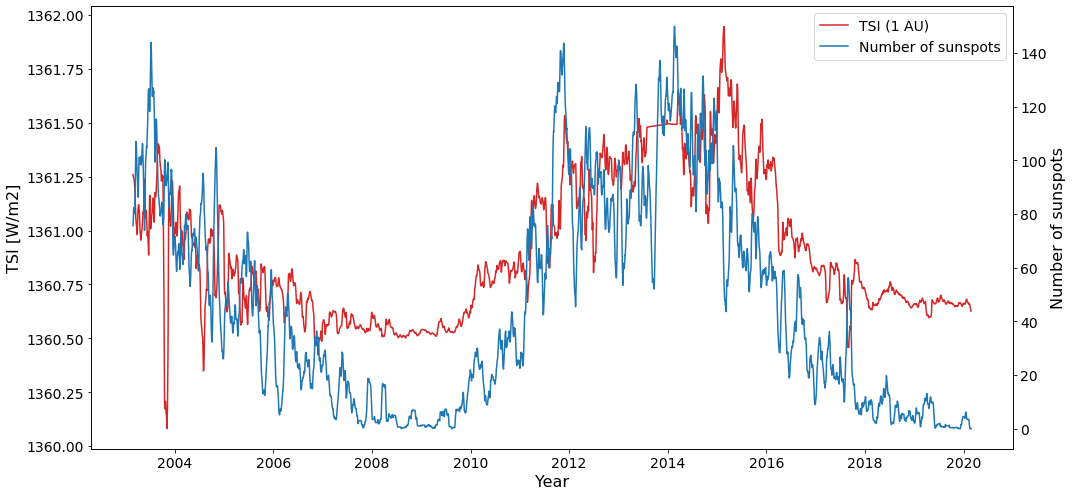

In [ ]:
# Plot the results of smoothing per month
fig, ax1 = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(15)

color = 'tab:red'
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('TSI [W/m2]', fontsize=16)
ax1.plot(df_TSI['Date (GD)'], df_TSI['MovMeanMonth'], color=color, label='TSI (1 AU)')
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of sunspots',  fontsize=16)  # we already handled the x-label with ax1
ax2.plot(df_num['Date (GD)'], df_num['MovMeanMonth'], color=color, label='Number of sunspots')
ax2.tick_params(axis='y', labelsize=14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes, fontsize=14)
plt.show()

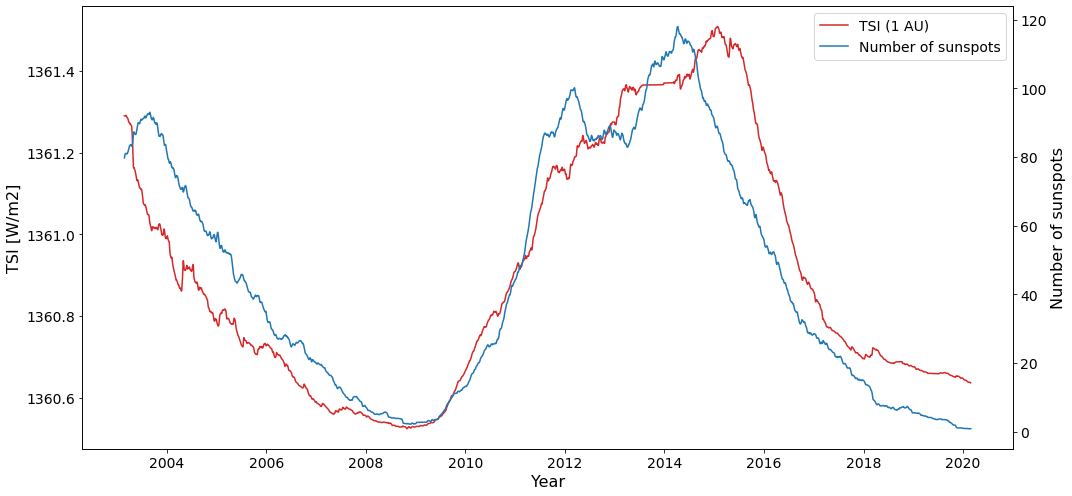

In [ ]:
# Plot the results of smoothing per year
fig, ax1 = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(15)

color = 'tab:red'
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('TSI [W/m2]', fontsize=16)
ax1.plot(df_TSI['Date (GD)'], df_TSI['MovMeanYear'], color=color, label='TSI (1 AU)')
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of sunspots',  fontsize=16)  # we already handled the x-label with ax1
ax2.plot(df_num['Date (GD)'], df_num['MovMeanYear'], color=color, label='Number of sunspots')
ax2.tick_params(axis='y', labelsize=14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes, fontsize=14)
plt.show()

**From the two graph above, we clearly see that the curves for TSI and the number of sunspots observed at the same period of time are showing the same behaviour. The difference between all three graphs is that the first one shows the real values obtained and averaged for one day, the second one is averaged over the period of one month and the third one is averaged over the year -- the larger the period taken for smoothing, the less noisy the graphs.**
**Referring to the lecture and additional information file attached to this assignment, we discussed the possible relationship between TSI and the number of sunspots. We figured out that short-term changes of few days to several weeks are typically dominated by the sunspots. It was shown by Chapman [1987] that the sunspot related dips produce changes of ~0.3 % in TSI. Moreover, over the solar cycle of ~11 years, variations of ~0.1% are observed due to the interplay between the sunspots and faculae and the changing emissions of bright magnetic elements tracing the chromospheric network boarders (Fontenla et al., 1999). That is what can be observed from the last graph: the variations are about ~0.07% over the solar cycle.**
**In general, total solar irradiance can be measured in space or at the Earth's surface. TSI in space is a function of distance from the Sun and the solar cycle,while for the Earth's surface we also need to consider additionally other parameters such as atmospheric conditions, for instance, which affect the accuracy of the measurements. It is the reason why it is better to conduct measurements in space. However, since space environment has harsh conditions such as high level of radiation, all the equipment in space is highly exposed to the degradation over time.**

**Learning log:**

In this assignment, we learned  what the total solar irradiance (TSI) is and how it is related to the number of sunspots observed on the Sun over a given period of time. We worked with two datasets which have the values of TSI and the avegare number of sunspots per day over a period of 18 years. From the graphs of TSI and the number of sunspots versus time, we discovered that the trend observed for the variations of the TSI value is highly similar to that for the number of sunspots which, as a result, turned out to be a proven dependency  Additionally, during implementation of this assignment, we recalled how to convert time from Julian to Gregorian days.
